# Lab 6: Data Analysis & Pre-Processing
For this lab, you will experiment with Python, NumPy and Pandas in order to perform some basic data preprocessing and exploratory tasks. You must only use Python, NumPy, Pandas & Matplotlib to perform the tasks for this lab.

## Importing Libraries
Here are the following libraries to be imported as part of the requirements of the lab:
- **Pandas:** Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
- **NumPy:** NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- **Matplotlib:** Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits.

In [1]:
# importing different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Using Pandas DataFrame, Statistics & `describe()`
Be sure to do the following in order to complete part one completely:
- [x] Download the data set adult-modified.csv and load it into a appropriate data structure such as the Pandas DataFrame.  
- [x] Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numeric attributes.
- [x] Use `describe()` and frequencies associated with categorical attributes

### Creating a DataFrane
Here, we create a DataFrame from the .csv file and then print out the details of that DataFrame

In [2]:
## taking the .csv file in and converting into a Pandas DataFrame
read_data = pd.read_csv("adult-modified.csv")

## printing out the DataFrame for viewing and understanding
read_data

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9407,38,Private,10,Married,White,Male,60,>50K
9408,25,Private,9,Single,White,Female,8,<=50K
9409,21,Private,10,Single,Black,Male,40,<=50K
9410,38,Private,2,Married,White,Male,53,<=50K


### Collecting all Integer Columns
We create a list ofall the column headings that contain integer values only

In [3]:
# collecting all the columns that have integer data values
integer_columns = ['age', 'education', 'hours-per-week']

### Calculating the Mean, Median & Standard Deviation using `.mean()`, `.median()` and `std()`
We calculate the mean of all the integer columns by using the `mean()` function and then print out the mean of each column

In [4]:
# calculating the mean of different integer columns
mean_data = read_data[integer_columns].mean().round(2)
mean_data.to_frame(name="mean")

,mean
age,38.36
education,10.13
hours-per-week,41.08


In [5]:
# calculating the median of different integer columns
median_data = read_data[integer_columns].median().round(2)
median_data.to_frame(name="median")

,median
age,37.0
education,10.0
hours-per-week,40.0


In [6]:
# calculating the standard deviation of different integer columns
standard_deviation_data = read_data[integer_columns].std().round(2)
standard_deviation_data.to_frame(name="standard deviation")

,standard deviation
age,12.96
education,2.54
hours-per-week,11.88


### Using `.describe()` to caluclate the frequencies of columns with categorical attributes
Here, we perform different operations on columns that contain non-numerical data

In [7]:
# summarizing the data
summary_data = read_data[['workclass', 'marital-status', 'race', 'sex', 'income']].describe()
summary_data

,workclass,marital-status,race,sex,income
count,9412,9412,9412,9412,9412
unique,3,2,5,2,2
top,Private,Married,White,Male,<=50K
freq,6947,4737,8062,6383,7093


## Part 2: Visualizing Numerical Data into Different Types of Graphs
Be sure to do the following in order to complete part two completely:
- [x] For the three numeric attributes (age, hours-per-week, education), display box plots that show the overall dispersion and skew in these variables.
- [x] Next, create histograms for these three variables showing the overall data distribution in each.
- [x] Finally, display a scatter plot of age (x-axis) vs. hours per week (y-axis)

### Displaying Box Plots 
Here, we create box plots for columns that have numerical data in order to display the overall dispersion and skew in the variables

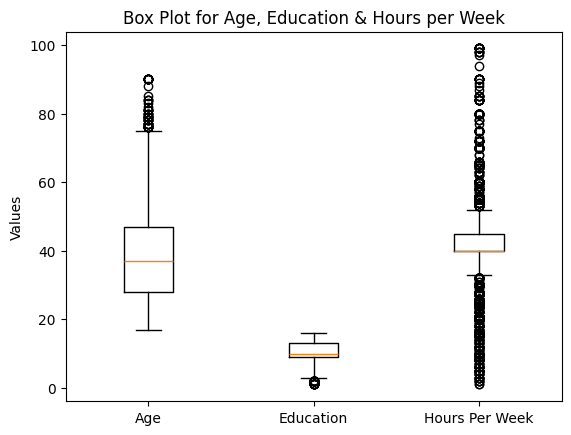

In [8]:
# displaying box plot for columns that have numerical data
plt.boxplot([read_data['age'], read_data['education'], read_data['hours-per-week']], labels=['Age', 'Education', 'Hours Per Week'])
plt.ylabel('Values')
plt.title('Box Plot for Age, Education & Hours per Week')
plt.show()

### Displaying Histograms 
Here, we create histograms for columns that have numerical data in order to display the overall distribution of data in each column.

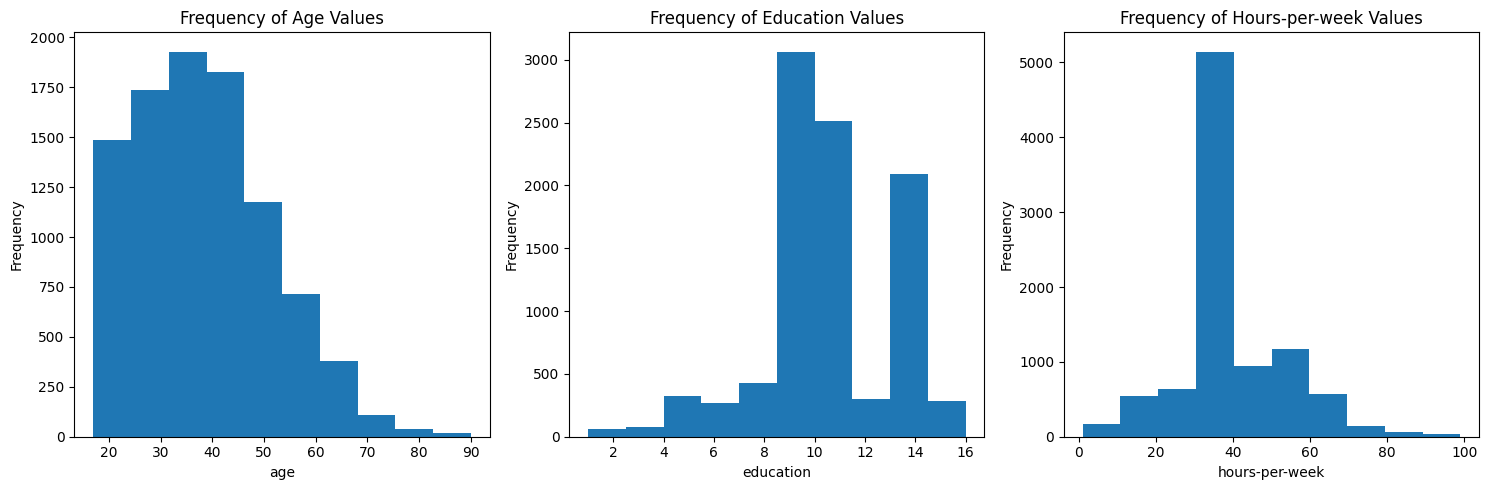

In [9]:
# displaying histograms of multiple columns

histogram_columns = ['age', 'education', 'hours-per-week']

figure, axes = plt.subplots(1, len(histogram_columns), figsize=(15, 5))  # Adjust figsize for better visualization


for i, column in enumerate(histogram_columns):
    axes[i].hist(read_data[column])  # Adjust bins and color as needed
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Frequency of {column.capitalize()} Values")

plt.tight_layout()
plt.show()

# plt.hist(read_data['age'])
# plt.xlabel("Age Values")
# plt.ylabel("Frequency")
# plt.title("Frequency of Age Values")
# plt.show()

### Displaying Scatter Plot
Lastly, we create a scatter plot where we plot the age (x-axis) against the hours per week (y-axis)

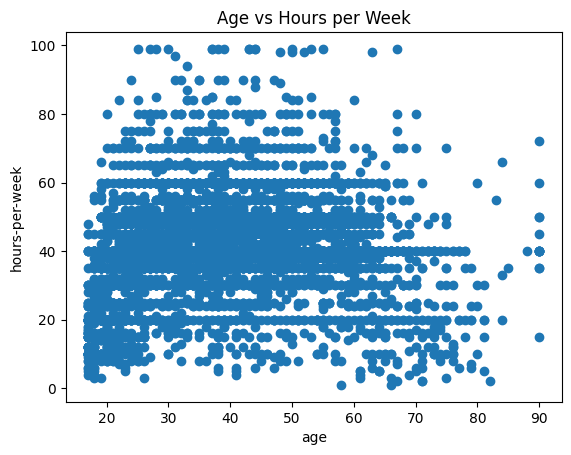

In [10]:
# displaying the scatter plot
plt.scatter(read_data['age'], read_data['hours-per-week'])
plt.xlabel('age')
plt.ylabel('hours-per-week')
plt.title('Age vs Hours per Week')
plt.show()

## Part 3: Creating Bar Charts of Categorical Data
Be sure to do the following in order to complete part three:
- [x] For the remaining categorical attributes, create bar charts that show the distribution of category frequencies. (e.g. married vs single, private vs public, self-employed;).
- [x] Be sure to use bar charts in a single figure as shown below

### Displaying Distribution of Category Frequencies
We create a bar chart of different categorical columns within the data set that shows the distribution of category frequencies

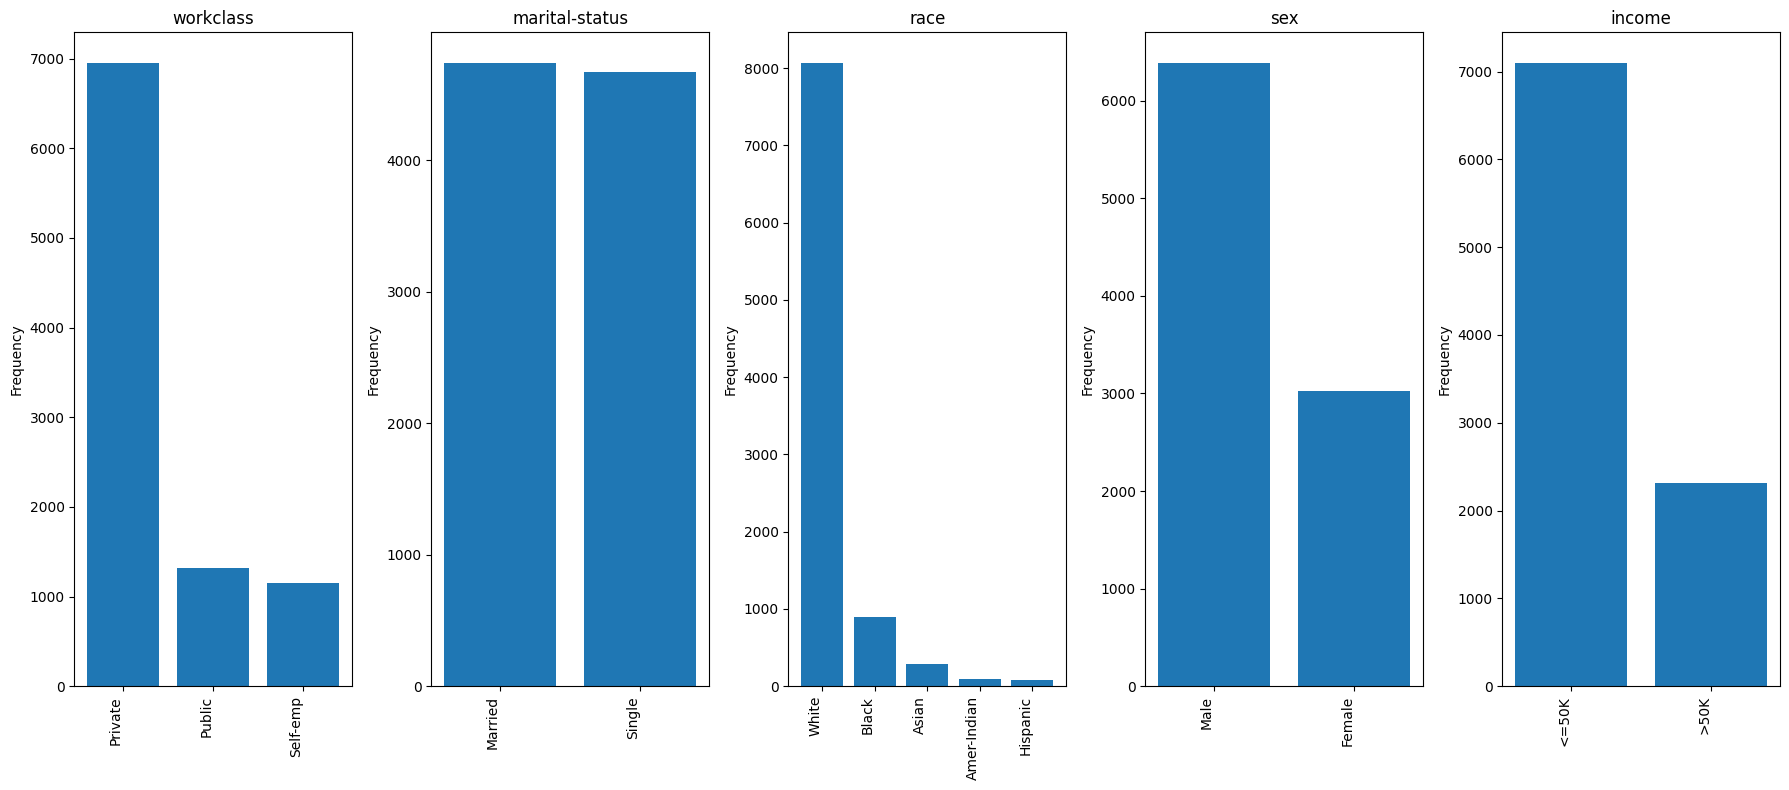

In [11]:
# displaying the distribution of category frequencies
column_names = ['workclass', 'marital-status', 'race', 'sex', 'income']

figure, axes = plt.subplots(1, len(column_names), figsize=(18,8))

for i, column in enumerate(column_names):
    unique_count = read_data[column].value_counts()
    axes[i].bar(unique_count.index, unique_count.values)
    axes[i].set_xticks(range(len(unique_count.index)))
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"{column}")

    plt.setp(axes[i].get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.show()

## Part 4: Cross Tabulation of Data
Be sure to do the following in order to complete part four:
- [x] Perform cross-tabulations of each of the work class and race attributes with the income attribute.
- [x] Show the resulting cross-tables as well as bar charts to visualize the relationships between these pairs of attributes.
- [x] In the case of race vs income cross tab, create another chart comparing the percentages of each race category that fall in low income group

### Cross Tabulation between Work, Race & Income
Here, we perform cross tabulation of data between the workclass and the income column, as well as the race and the income column

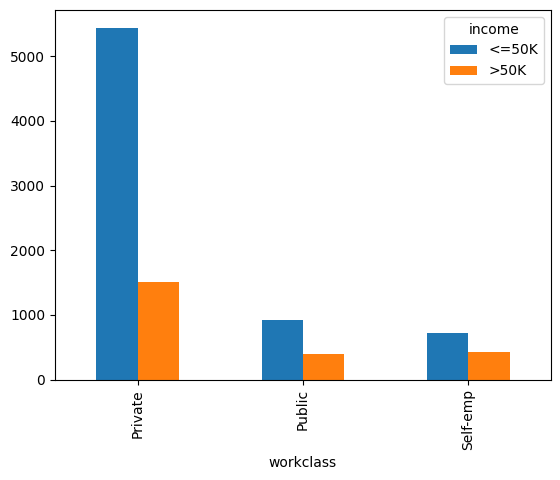

In [12]:
# cross tabulation between work class and income attribute
work_race_grouped = pd.crosstab(read_data['workclass'], read_data['income'])
work_race_grouped.plot(kind="bar")
plt.show()

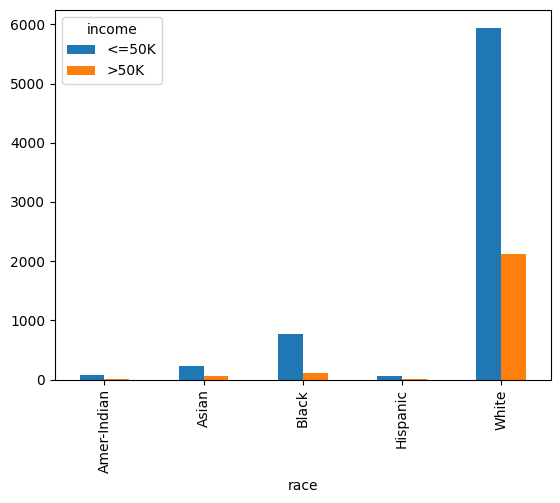

In [13]:
# cross tabulation between race attribute and income attribute
work_race_grouped = pd.crosstab(read_data['race'], read_data['income'])
work_race_grouped.plot(kind="bar")
plt.show()

### Comparison of Percentages of each Low Income Race Group
Now, we compare the percentages of each low income race group within the given dataset that we've been provided with.

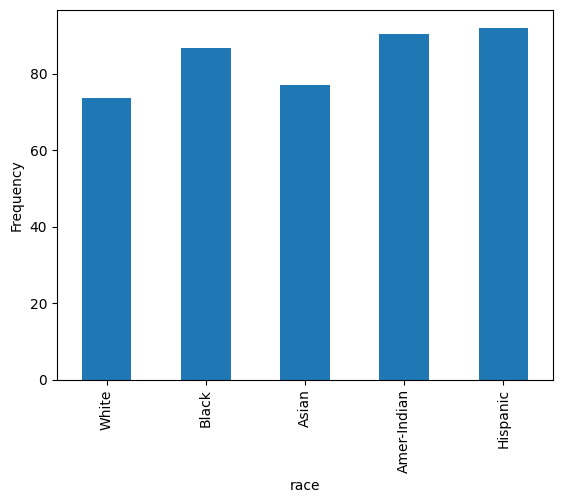

In [14]:
# comparing percentages of each low income race group
low_income = read_data[read_data['income'] =='<=50K']
low_race = low_income['race'].value_counts()
total_race = read_data['race'].value_counts()
calculated_percentage = (low_race / total_race) * 100
calculated_percentage.plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

## Part 5: Comparision and Analysis
Be sure to do the following in order to complete part five:
- [x] Compare and contrast the characteristics of the low income and high income categories across the different attributes.
- [x] Consider creating separate subsets of the data based on the income categories and then characterizing each subset by observing summary statistics for each group across different variables.
- [x] Discuss observations focusing on unique characteristics that distinguish among the two groups. 

### Creating Subsets of Data
Here, we focus on creating subsets of data based off of income for each different attributes

In [15]:
# creating high income and low income category subsets of data
low_income_category = read_data[read_data['income'] == "<=50K"]
high_income_category = read_data[read_data['income'] == ">50K"]

### Summary Statistics
Next, we characterize each subset by checking the summary statistics for each group across different column headings

In [16]:
# displaying the low income statistics
low_income_statistics = low_income_category.describe()
low_income_statistics

,age,education,hours-per-week
count,7093.000000,7093.000000,7093.000000
mean,36.635979,9.646976,39.567038
std,13.339117,2.397358,11.868506
min,17.000000,1.000000,1.000000
25%,26.000000,9.000000,38.000000
50%,35.000000,9.000000,40.000000
75%,45.000000,10.000000,40.000000
max,90.000000,16.000000,99.000000


In [17]:
# displaying the high income statistics
high_income_statistics = high_income_category.describe()
high_income_statistics

,age,education,hours-per-week
count,2319.000000,2319.000000,2319.000000
mean,43.622251,11.588185,45.708495
std,10.047667,2.410764,10.678794
min,19.000000,2.000000,1.000000
25%,36.000000,9.000000,40.000000
50%,43.000000,12.000000,40.000000
75%,50.000000,13.000000,50.000000
max,90.000000,16.000000,99.000000


### Visualizing Data for Low Income & High Income
Next, we visualize the data for the low income and high income categories and see the visual difference between them

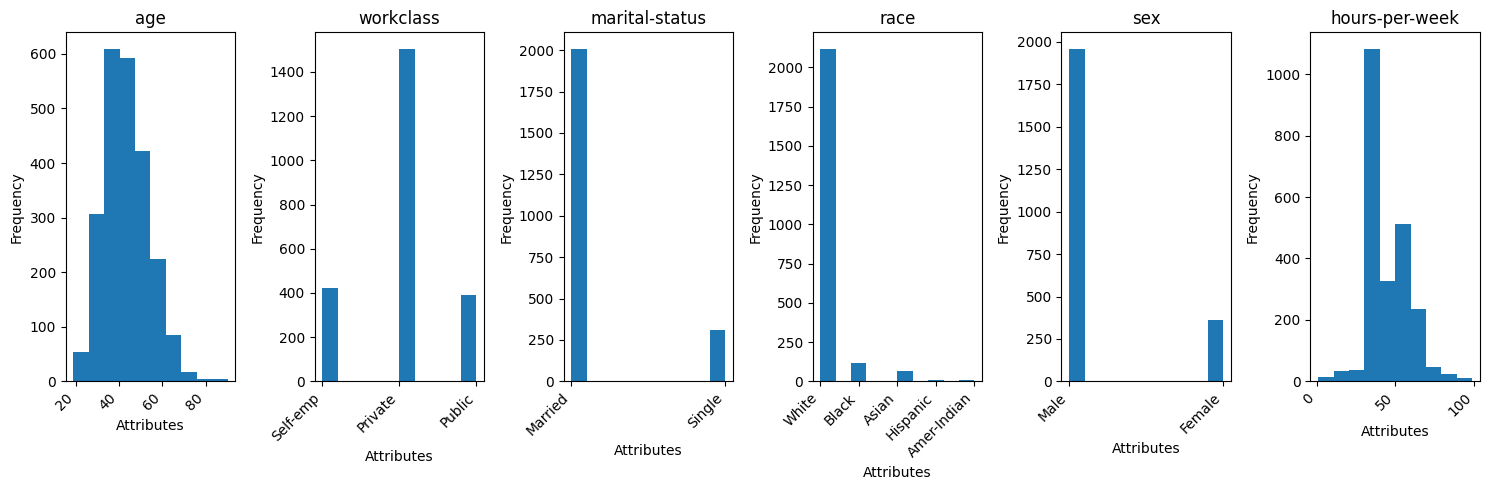

In [18]:
# visualizing the high income data subset using matplotlib
column_list = ['age', 'workclass', 'marital-status', 'race', 'sex', 'hours-per-week']
column_length = len(column_list)

figure, axes = plt.subplots(1, column_length, figsize=(15, 5), sharey=False)

for i, column in enumerate(column_list):
    axes[i].hist(high_income_category[column])
    axes[i].set_xlabel("Attributes")
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"{column}")

    plt.setp(axes[i].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()  

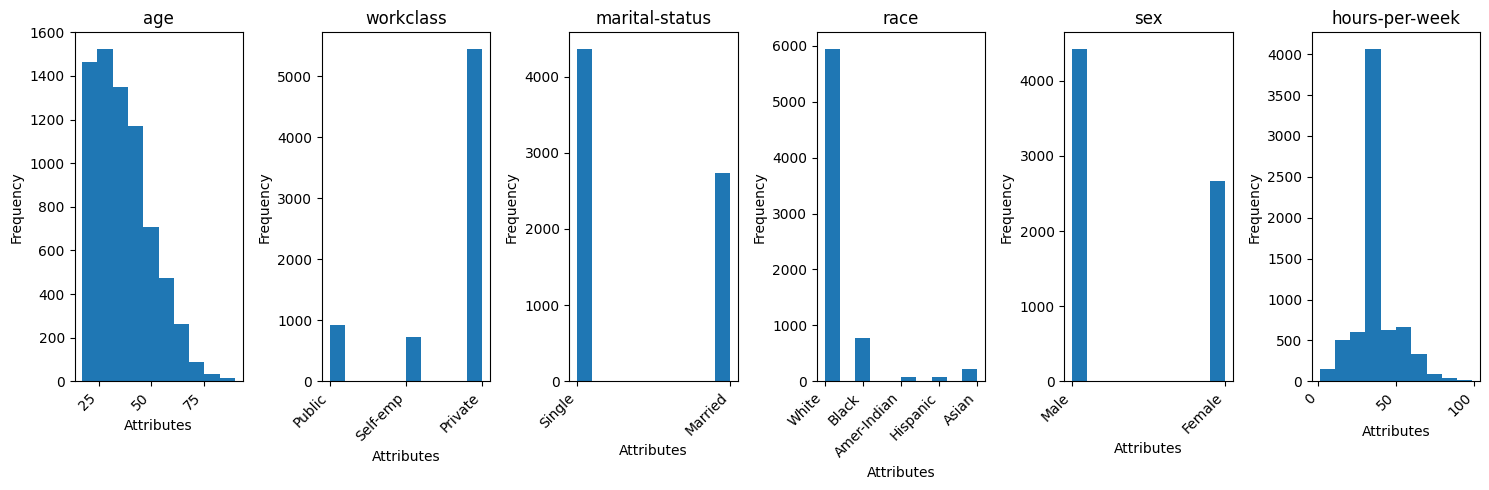

In [19]:
# visualizing the low income data subset using matplotlib
column_list = ['age', 'workclass', 'marital-status', 'race', 'sex', 'hours-per-week']
column_length = len(column_list)

figure, axes = plt.subplots(1, column_length, figsize=(15, 5), sharey=False)

for i, column in enumerate(column_list):
    axes[i].hist(low_income_category[column])
    axes[i].set_xlabel("Attributes")
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"{column}")

    plt.setp(axes[i].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()  

### Observations into Statistics
Lastly, we check the unique characteristics that help to distinguish between the two groups of incomes

**Observation:** from this data, we can see the following observations:
- It is seen that people at the age of 50 have the highest income compared to toher age groups
- Private employees tend to have the highest income compared to self-employed and public employees
- Married people have a higher income than single people and this would make sense as there are two people contributing to the household
- Males tend to have a higher income than females and there are people who are willing to work 50 hours per week to make that high income

## Part 6: One Hot Encoding
Be sure to do the following in order to complete part six:
- [x] Convert the data into the standard spreadsheet format. Note that this requires converting each categorical attribute into multiple binary attributes
- [x] The numeric attributes should remain unchanged
- [x] Save the data in a new DataFrame and show the top 10 rows in the new DataFrame. Save the new table into a local file called `adult_numeric.csv` 

In [20]:
# performing one hot encoding
encoded_data = pd.get_dummies(read_data, columns=["workclass", "marital-status", "race", "sex", "income"], drop_first=True)

### Showing Top 10 Rows
In order to show the top 10 rows of a Pandas DataFrame, what we can use is the `.head()` method, with a given parameter that shows the exact number of the top ten rows.

In [21]:
# showing the top ten rows using .head()
encoded_data.head(10)

,age,education,hours-per-week,workclass_Public,workclass_Self-emp,marital-status_Single,race_Asian,race_Black,race_Hispanic,race_White,sex_Male,income_>50K
0,39,13,40,True,False,True,False,False,False,True,True,False
1,50,13,13,False,True,False,False,False,False,True,True,False
2,38,9,40,False,False,True,False,False,False,True,True,False
3,53,7,40,False,False,False,False,True,False,False,True,False
4,28,13,40,False,False,False,False,True,False,False,False,False
5,37,14,40,False,False,False,False,False,False,True,False,False
6,49,5,16,False,False,False,False,True,False,False,False,False
7,52,9,45,False,True,False,False,False,False,True,True,True
8,31,14,50,False,False,True,False,False,False,True,False,True
9,42,13,40,False,False,False,False,False,False,True,True,True


### Saving the Data
Lastly, we can save the Pandas DataFrame in a `.csv` file, which can then be saved with a given filename

In [22]:
# saving thhe data as a .csv file
encoded_data.to_csv('adult_numeric.csv', index=False)

## Part 7: Correlation Analysis
Be sure to do the following in order to complete part seven:
- [x] Using the numeric dataset with dummy variables, perform basic correlation analysis among the attributes and construct a complex correlation matrix
- [x] Use the correlation matrix to display the decreasing order of correlations, all attributes and their correlations to education
- [x] Repeat to display correlations with attribute income <=50K . Briefly discuss general observations about sample of adult population based on this correlation analysis. 

### Constructing a Complex Correlation Matrix
Using the numeric dataset we have produced, we will now construct a complex correlation matrix for analytical purposes

In [23]:
# creating a correlation matrix, and displaying the correlation matrix
new_data = pd.read_csv("adult_numeric.csv")
new_data['income_<50K'] = ~new_data['income_>50K']
new_data

,age,education,hours-per-week,workclass_Public,workclass_Self-emp,marital-status_Single,race_Asian,race_Black,race_Hispanic,race_White,sex_Male,income_>50K,income_<50K
0,39,13,40,True,False,True,False,False,False,True,True,False,True
1,50,13,13,False,True,False,False,False,False,True,True,False,True
2,38,9,40,False,False,True,False,False,False,True,True,False,True
3,53,7,40,False,False,False,False,True,False,False,True,False,True
4,28,13,40,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,38,10,60,False,False,False,False,False,False,True,True,True,False
9408,25,9,8,False,False,True,False,False,False,True,False,False,True
9409,21,10,40,False,False,True,False,True,False,False,True,False,True
9410,38,2,53,False,False,False,False,False,False,True,True,False,True


In [24]:
# correlating the matrix and displaying it
correlation_matrix = new_data.corr()
correlation_matrix

,age,education,hours-per-week,workclass_Public,workclass_Self-emp,marital-status_Single,race_Asian,race_Black,race_Hispanic,race_White,sex_Male,income_>50K,income_<50K
age,1.000000,0.034733,0.103170,0.080254,0.187633,-0.381168,-0.008097,-0.008668,-0.031973,0.022413,0.071804,0.232261,-0.232261
education,0.034733,1.000000,0.141730,0.154462,0.044472,-0.050627,0.057360,-0.069029,-0.044845,0.051765,0.008180,0.329066,-0.329066
hours-per-week,0.103170,0.141730,1.000000,-0.021407,0.154025,-0.183944,0.000550,-0.071442,0.011964,0.055561,0.221588,0.222686,-0.222686
workclass_Public,0.080254,0.154462,-0.021407,1.000000,-0.150335,0.002351,0.012883,0.070250,-0.018927,-0.066491,-0.045338,0.047981,-0.047981
workclass_Self-emp,0.187633,0.044472,0.154025,-0.150335,1.000000,-0.165075,0.006576,-0.080694,-0.011495,0.071008,0.145559,0.105593,-0.105593
marital-status_Single,-0.381168,-0.050627,-0.183944,0.002351,-0.165075,1.000000,-0.017852,0.104427,-0.000605,-0.082114,-0.357736,-0.414173,0.414173
race_Asian,-0.008097,0.057360,0.000550,0.012883,0.006576,-0.017852,1.000000,-0.057795,-0.016009,-0.436496,-0.001773,-0.006693,0.006693
race_Black,-0.008668,-0.069029,-0.071442,0.070250,-0.080694,0.104427,-0.057795,1.000000,-0.028999,-0.790710,-0.106323,-0.084836,0.084836
race_Hispanic,-0.031973,-0.044845,0.011964,-0.018927,-0.011495,-0.000605,-0.016009,-0.028999,1.000000,-0.219019,-0.004766,-0.034607,0.034607
race_White,0.022413,0.051765,0.055561,-0.066491,0.071008,-0.082114,-0.436496,-0.790710,-0.219019,1.000000,0.097025,0.092589,-0.092589


### Attributes and Correlation to Education
We now use the correlation matrix to correlate the attributes with education in a decreasing order. This can be used for analytical purposes.

In [25]:
# correlation between income_>50K and other attributes
education_correlation = correlation_matrix['education'].sort_values(ascending=False)
education_correlation

education                1.000000
income_>50K              0.329066
workclass_Public         0.154462
hours-per-week           0.141730
race_Asian               0.057360
race_White               0.051765
workclass_Self-emp       0.044472
age                      0.034733
sex_Male                 0.008180
race_Hispanic           -0.044845
marital-status_Single   -0.050627
race_Black              -0.069029
income_<50K             -0.329066
Name: education, dtype: float64

In [26]:
# correlation between income_<50K and other attributes
income_correlation = correlation_matrix['income_<50K'].sort_values(ascending=False)
income_correlation

income_<50K              1.000000
marital-status_Single    0.414173
race_Black               0.084836
race_Hispanic            0.034607
race_Asian               0.006693
workclass_Public        -0.047981
race_White              -0.092589
workclass_Self-emp      -0.105593
sex_Male                -0.203886
hours-per-week          -0.222686
age                     -0.232261
education               -0.329066
income_>50K             -1.000000
Name: income_<50K, dtype: float64

### General Observations
Lastly, discuss the general observations about a sample adult population based off of the correlation analysis

**Observation:** from the observation, we can see the following things:
- when it comes to correlation between education and other attributes, the three leading attributes are income being greater than 50K, where the adult works in a public job, and the hours per week they work
- when it comes to correlation between income being less than 50K and other attributes, the three leading attributes are single adults, who are black or hispanic

## Part 8: Discretizing Attributes
Be sure to do the following in order to complete eight:
- [x] Discretize the age attribute into three categories, which can correspond to “young”, “mid-age” and “old”
- [x] Don’t change the original age attribute or add the discretized age to the table
- [x] Create a new DataFrame with the numeric and the discretized age attributes as two columns and display the top ten rows of the new DataFrame

### Discretizing Attributes
Here, we discretize the age attributes by having it to corresponding it to three different categories, which gives a further insight into the data. To accomplish this, we can use bins to define age ranges and then use `cut()` to discretize the age column.

In [27]:
# categorizing the attributes
bins = [0, 23, 50, 100]
labels = ['young', 'mid-age', 'old']

new_data['categorized_age'] = pd.cut(new_data['age'], bins=bins, labels=labels, right=False)
age_df = new_data[['age', 'categorized_age']]
age_df.head(10)

,age,categorized_age
0,39,mid-age
1,50,old
2,38,mid-age
3,53,old
4,28,mid-age
5,37,mid-age
6,49,mid-age
7,52,old
8,31,mid-age
9,42,mid-age


## Part 9: Min-Max Normalization
- [x] Use min-max normalization to transform the values of the attribute “hours per week” within the range 0 to 1.
- [x] Perform z-score normalization to standardize the values of all numeric attributes (age, hours per week and education). This should be performed on all three attributes at the same time instead of one by one.
- [x] Show the top ten rows of the three versions of the hours per week attribute (original, normalized and standardized), side by side in a new DataFrame.

### Min-Max Normalization
First up, we perform min-max normalization in order to convert the values of the column named "hours per week". For every feature, the minimum value of that feature get transformed into a 0, the maximum value gets transformed into a 1, and any other value becomes a decimal between 0 and 1.

In [28]:
# min-max normalization
min_max_columns = ['age', 'education', 'hours-per-week']
minimum_hours = new_data[min_max_columns].min()
maximum_hours = new_data[min_max_columns].max()
min_max_df = (new_data[min_max_columns] / minimum_hours) / (maximum_hours - minimum_hours)
min_max_df

,age,education,hours-per-week
0,0.031426,0.866667,0.408163
1,0.040290,0.866667,0.132653
2,0.030620,0.600000,0.408163
3,0.042707,0.466667,0.408163
4,0.022562,0.866667,0.408163
...,...,...,...
9407,0.030620,0.666667,0.612245
9408,0.020145,0.600000,0.081633
9409,0.016922,0.666667,0.408163
9410,0.030620,0.133333,0.540816


### Z-Score Normalization
Next up, we perform the z-score normalization to standardize all numeric attributes. We use z-score as a strategy of normlaizing data that avoids the outlier issue. We use the value of the mean and standard deviation of the feature.

In [29]:
# z-score normalization
z_columns = ['age', 'education', 'hours-per-week']
mean_data = new_data[z_columns].mean()
std_data = new_data[z_columns].std()
z_df = (new_data[z_columns] - mean_data) / std_data
z_df

,age,education,hours-per-week
0,0.049582,1.130842,-0.090892
1,0.898208,1.130842,-2.362742
2,-0.027566,-0.442649,-0.090892
3,1.129651,-1.229394,-0.090892
4,-0.799044,1.130842,-0.090892
...,...,...,...
9407,-0.027566,-0.049276,1.591959
9408,-1.030487,-0.442649,-2.783455
9409,-1.339078,-0.049276,-0.090892
9410,-0.027566,-3.196258,1.002961


### Combining DataFrames
To show all the DataFrames together, we combine the min-max normalization DataFrame with the Z-score normalization

In [30]:
# combining the DataFrames together
final_df = pd.concat([min_max_df, z_df], axis=1)
final_df

,age,education,hours-per-week,age,education,hours-per-week
0,0.031426,0.866667,0.408163,0.049582,1.130842,-0.090892
1,0.040290,0.866667,0.132653,0.898208,1.130842,-2.362742
2,0.030620,0.600000,0.408163,-0.027566,-0.442649,-0.090892
3,0.042707,0.466667,0.408163,1.129651,-1.229394,-0.090892
4,0.022562,0.866667,0.408163,-0.799044,1.130842,-0.090892
...,...,...,...,...,...,...
9407,0.030620,0.666667,0.612245,-0.027566,-0.049276,1.591959
9408,0.020145,0.600000,0.081633,-1.030487,-0.442649,-2.783455
9409,0.016922,0.666667,0.408163,-1.339078,-0.049276,-0.090892
9410,0.030620,0.133333,0.540816,-0.027566,-3.196258,1.002961


## Part 10: Pandas and Missing Values
Download a modified version of the data that contains missing values, and perform the following:
- [x] Using Pandas, determine all the attributes with missing values and the number of missing values for each attribute
- [x] Show all instances in the data that contain a missing value
- [x] Fill the missing values for all numeric attributes using the mean value for the attribute
- [x] After filling in the missing numeric values, drop all rows where a categorical attribute contains a missing value
- [x] Show that the final resulting table doesn’t contain missing values

### Loading up the `.csv` File
Here, we use `read_csv()` to load up the file that we want to view. This requires a string parameter to be passed in in order to locate the file

In [31]:
# opening up the .csv file
missing_data = pd.read_csv('adult-modified-missing-vals.csv')
missing_data

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38,Private,10,Married,White,Male,60,>50K
9996,25,Private,9,Single,White,Female,8,<=50K
9997,21,Private,10,Single,Black,Male,40,<=50K
9998,?,Private,2,Married,White,Male,53,<=50K


### Determining Missing Values
To find missing values, we use `isnull()` along with the `sum()` to find out how many missing values there are for each attribute. Before we do that, we need to replace each mention of "?" with a null variable.

In [32]:
# replacing the ? with NaN
missing_data.replace("?", np.nan, inplace=True)
missing_data

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38,Private,10,Married,White,Male,60,>50K
9996,25,Private,9,Single,White,Female,8,<=50K
9997,21,Private,10,Single,Black,Male,40,<=50K
9998,NaN,Private,2,Married,White,Male,53,<=50K


In [33]:
# determining the attributes with missing values, and how many of them are missing attributes
missing_columns = missing_data.isnull().sum()
missing_columns

age               198
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

### Missing Value Instances
Next, we find rows of data that contain any missing values

In [34]:
# instances in the data that contains a missing value
missing_instances = missing_data[missing_data.isnull().any(axis=1)]
missing_instances

,age,workclass,education,marital-status,race,sex,hours-per-week,income
19,NaN,Self-emp,14,Single,White,Female,45,>50K
27,NaN,NaN,10,Married,Asian,Male,60,>50K
40,NaN,Private,5,Married,White,Male,43,<=50K
61,32,NaN,4,Married,White,Male,40,<=50K
65,NaN,Private,9,Married,White,Male,40,<=50K
...,...,...,...,...,...,...,...,...
9965,NaN,Private,10,Married,Amer-Indian,Female,40,<=50K
9966,NaN,Private,13,Married,White,Male,50,>50K
9987,67,NaN,4,Married,White,Male,40,<=50K
9993,NaN,Private,9,Married,White,Female,15,<=50K


### Replacing Missing Values with Mean
Next up, we replace every single missing value in DataFrame with the means of the columns

In [35]:
# replacing missing values with the mean of the columns
mean_data = read_data['age'].mean()
missing_data['age'] = missing_data['age'].fillna(mean_data)
missing_data

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38,Private,10,Married,White,Male,60,>50K
9996,25,Private,9,Single,White,Female,8,<=50K
9997,21,Private,10,Single,Black,Male,40,<=50K
9998,38.35731,Private,2,Married,White,Male,53,<=50K


In [36]:
# removing any rows with NaN
missing_data = missing_data.dropna()
missing_data

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38,Private,10,Married,White,Male,60,>50K
9996,25,Private,9,Single,White,Female,8,<=50K
9997,21,Private,10,Single,Black,Male,40,<=50K
9998,38.35731,Private,2,Married,White,Male,53,<=50K


### Displaying the First Ten Rows
Lastly, we are displaying the first tewenty rows of the dataset or pandas DataFrame

In [37]:
missing_data.head(20)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
5,37,Private,14,Married,White,Female,40,<=50K
6,49,Private,5,Married,Black,Female,16,<=50K
7,52,Self-emp,9,Married,White,Male,45,>50K
8,31,Private,14,Single,White,Female,50,>50K
9,42,Private,13,Married,White,Male,40,>50K
